# Question Two

When it comes to accuracy in the real world, I think that the measurement of how well a self driving car detects and responds correctly to road signs is important. This is because you would want to see the proportion between when it works as expected and when it does not.

For sensitivity and specifitivity, I think a real world application would be the data behind determining whether an individual has cancer or not, which coincides with whether or not an individual must recieve treatment. It is important in this scenario because wrongly identifying true positives and true negatives are bad as you may give a cancer free individual unncessesary treatment, or leave a patient with cancer without treatment they need. 

Regarding precision, I think that an important example that would require precision to be addressed is acknowledging and defining scam versus real calls. Identifying them correctly would ensure that real calls are not depicted as a scam. If this is not precise, many issues might arise.

# Question Three/Four

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# Step 1: Drop specified columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Step 2: Drop specified columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Step 3: Drop rows with NaN values and create a copy to avoid SettingWithCopyWarning
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Step 4: Change data types using .loc to avoid SettingWithCopyWarning
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 5: Verify the changes
print(ab_reduced_noNaN.info())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None


In [4]:
from sklearn.model_selection import train_test_split

# Perform an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, 
    test_size=0.2,  # 20% for testing
    random_state=42  # For reproducibility
)

# Verify the split
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

Training set size: 255
Testing set size: 64


In [5]:
# Set a random seed for reproducibility
random_seed = 42

# Shuffle and take 80% for training
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=0.8, random_state=random_seed)

# Use the remaining 20% for testing
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

# Verify the split
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")


Training set size: 255
Testing set size: 64


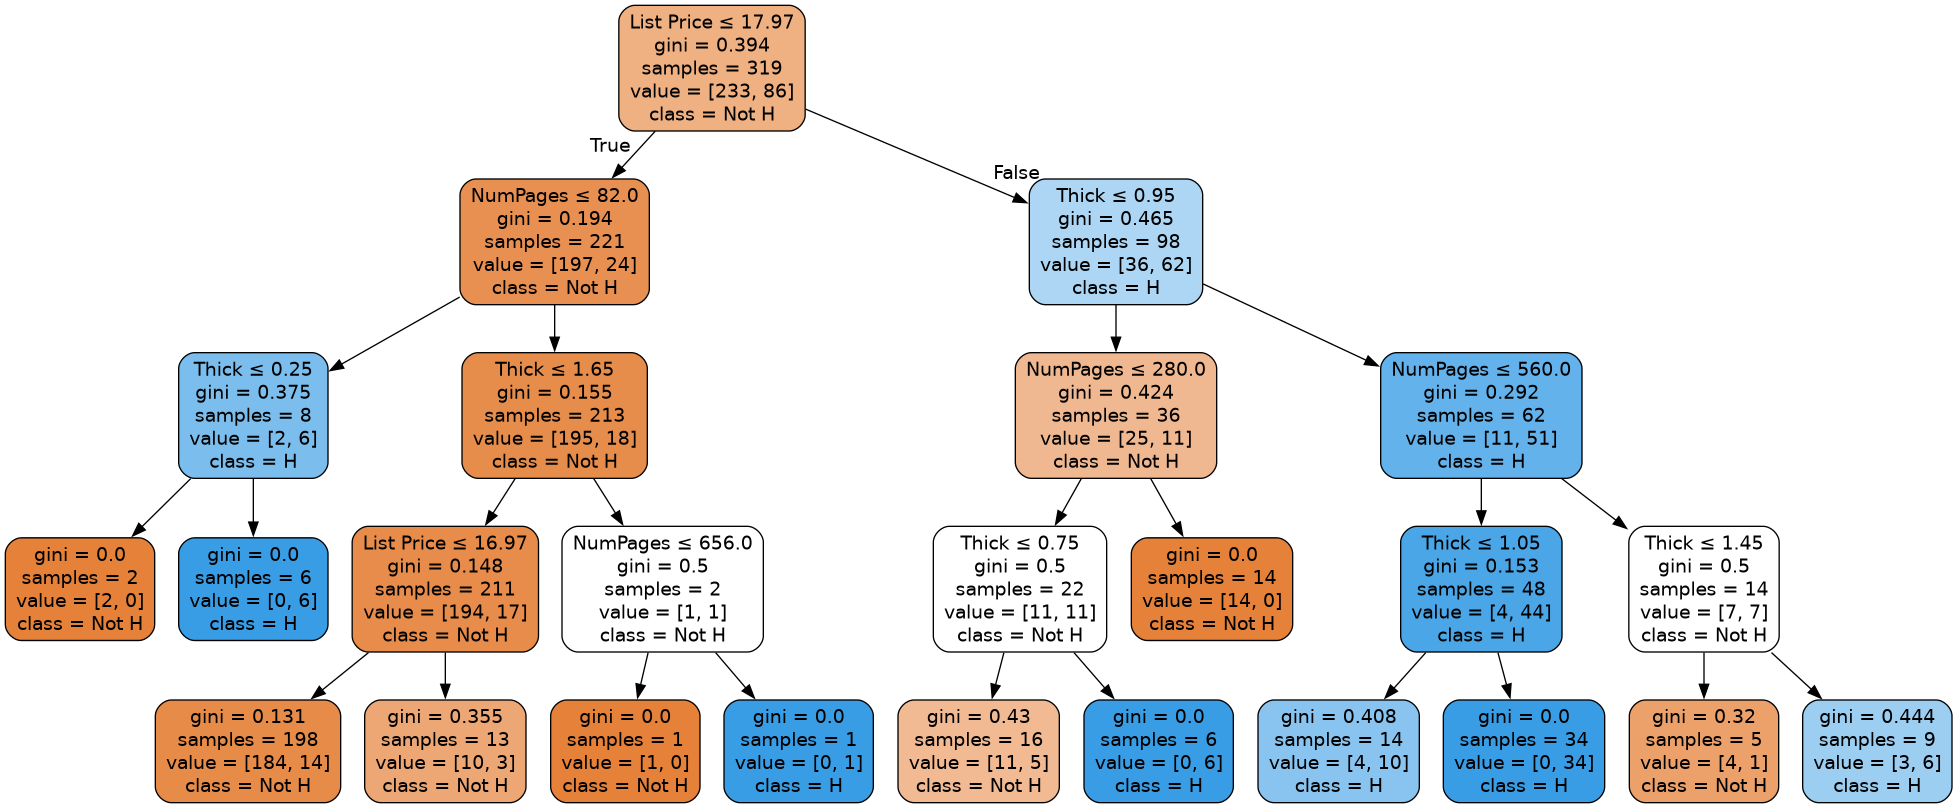

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

# Assuming you've already created X and y
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Step 1: Train a Decision Tree Classifier with max_depth=4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# Step 2: Visualize the Decision Tree
dot_data = export_graphviz(
    clf, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=['Not H', 'H'], 
    filled=True, 
    rounded=True, 
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)

# Display the image directly in the notebook (works well in Jupyter)
from IPython.display import Image
Image("decision_tree.png")

Predictions are made by looking at data and splitting it by how well its criteria breaks the data into its categories. It tests all possibilities and idealizes the scenario by reducing impurities and increasing information gain.

# Question Five/Six

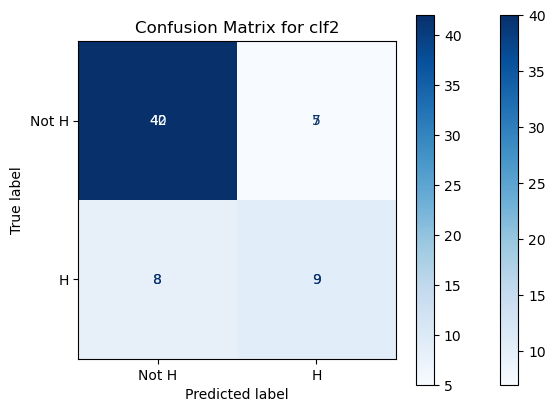

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming ab_reduced_noNaN_train and ab_reduced_noNaN_test are your training and test sets
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Train set features
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Train set target

X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Test set features
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Test set target

# Train the first model (clf)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Train the second model (clf2) - you can train it with different hyperparameters or a different model type
clf2 = DecisionTreeClassifier(max_depth=6, random_state=42)  # Example: different max_depth for clf2
clf2.fit(X_train, y_train)

# Make predictions using both clf and clf2
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Create confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Not H', 'H'])
disp_clf.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix for clf")

# Create confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Not H', 'H'])
disp_clf2.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix for clf2")

# Show both confusion matrices
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate confusion matrix for clf and clf2
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Calculate accuracy for clf and clf2
accuracy_clf = accuracy_score(y_test, y_pred_clf)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Calculate sensitivity and specificity for clf
TP_clf = cm_clf[1, 1]  # True Positives
TN_clf = cm_clf[0, 0]  # True Negatives
FP_clf = cm_clf[0, 1]  # False Positives
FN_clf = cm_clf[1, 0]  # False Negatives

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)

# Calculate sensitivity and specificity for clf2
TP_clf2 = cm_clf2[1, 1]  # True Positives
TN_clf2 = cm_clf2[0, 0]  # True Negatives
FP_clf2 = cm_clf2[0, 1]  # False Positives
FN_clf2 = cm_clf2[1, 0]  # False Negatives

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)

# Print the metrics
print(f"Metrics for clf (max_depth=4):")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")

print(f"\nMetrics for clf2 (max_depth=6):")
print(f"Accuracy: {accuracy_clf2:.4f}")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")


Metrics for clf (max_depth=4):
Accuracy: 0.7656
Sensitivity: 0.5294
Specificity: 0.8511

Metrics for clf2 (max_depth=6):
Accuracy: 0.7969
Sensitivity: 0.5294
Specificity: 0.8936


For clf, the accuracy is 0.7656, the sensitivity is 0.5294, and the specificity is 0.8511.  
For clf2, the accuracy is 0.7969, the sensitivity is 0.5294, and the specificity is 0.8936. 

# Question Seven
The difference between these models are the added features to the model. The features such as NumPages and Thick would give better results if they provided crutial information to allow the model to work better. The two confusion matrices above are better because they were trained with more meaningful features, better decision boundaries, which allow for a better fit and more accurate models.

# Question Eight

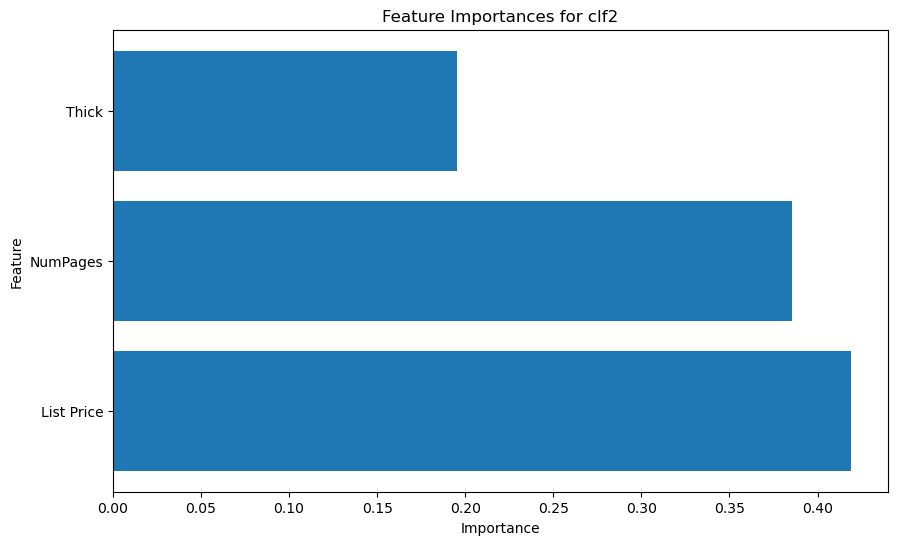

The most important feature is: List Price


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf2 is your trained DecisionTreeClassifier

# Get the feature importances from clf2
importances = clf2.feature_importances_

# Get the feature names from clf2
features = clf2.feature_names_in_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for clf2")
plt.barh(range(len(features)), importances[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Print the most important feature
most_important_feature = features[indices[0]]
print(f"The most important feature is: {most_important_feature}")


# Question Nine
The differences of interpreting coefficients in a linear regression model, versus feature importances in decision trees are that in linear regression models, coefficients discuss the effects if any of the predictor variable on the target variable, while feature importance speaks on how useful each feature is when it comes to accuracy. Also for coefficients, it is assumed that there is no relation, while the opposite is percieved for decision trees.

Link to chatgpt summary: https://chatgpt.com/share/673c07b3-c83c-8007-a197-68427c00e028